# Imports

In [1]:
import sys
sys.path.append('/groups/umcg-wijmenga/tmp01/projects/lude_vici_2021/rawdata/non-coding-somatic-mutations-in-cancer/Anne/scripts/')
from Database import Database
# import multiprocessing as mp
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.distributions import chi2
from bioinfokit import analys, visuz
from scipy.stats import fisher_exact
import time
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import mannwhitneyu



from fisher import pvalue_npy
from scipy.stats import chi2_contingency
from scipy.stats import uniform, randint

# Get Data

In [ ]:
# path_db = 'D:/Hanze_Groningen/STAGE/lastdb/db_laatste_copy.db' #'D:/Hanze_Groningen/STAGE/DATAB/copydatabase_C.db'
# # Database connection
# db = Database(path_db)
# df_whole = pd.read_sql('''SELECT project.cancer, sum_dosage_GT.donor_project_ID, 
#                             sum_dosage_GT.donor_ID, sum_dosage_GT.snp_ID, sum_dosage_GT.GT2,
#                             snp.chr, snp.pos_start, snp.pos_end, snp.ref, snp.alt,
#                             snp.UCNE, snp.TFBS, snp.DNase, 
#                             snp.in_transcript, snp.in_coding, snp.in_exon,
#                             snp.before_gene, snp.after_gene, 
#                             snp.ID_eQTL, snp.eQTL, snp.close_eQTL_3000
#                     FROM project, sum_dosage_GT, snp 
#                     WHERE sum_dosage_GT.snp_ID=snp.ID AND 
#                               sum_dosage_GT.donor_project_ID = project.ID AND 
#                               (sum_dosage_GT.GT2 = 1 OR sum_dosage_GT.GT2 = 2) AND 
#                               sum_dosage_GT.total_read_count_sum >= 33;''', db.mydb_connection)
# db.close()
# df_whole.to_csv("D:/Hanze_Groningen/STAGE/lastdb/df_whole.tsv", sep='\t', encoding='utf-8', index=False)
# df_whole

In [ ]:
# df_whole['snp'] = df_whole['chr'].map(str) + '_' + df_whole['pos_start'].map(str) + '_' + df_whole['pos_end'].map(str)
# df_whole.to_csv("D:/Hanze_Groningen/STAGE/lastdb/df_whole_SNP.tsv", sep='\t', encoding='utf-8', index=False)
# df_whole

In [ ]:
df_whole = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/df_whole.tsv", sep='\t')
# df_whole = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/df_whole_SNP.tsv", sep='\t')
df_whole

# Filter data

In [ ]:
# Delete MT chromosoom
df_whole = df_whole.loc[df_whole['chr'] != 'MT']
print(set(df_whole['chr']))

In [ ]:
df_whole.dtypes

### non-coding, coding

In [ ]:
# #0=false
# noncoding_df = df_whole.loc[(df_whole['in_transcript'] == 0) & (df_whole['in_coding'] == 0) & (df_whole['in_exon'] == 0)]
# noncoding_df.to_csv("D:/Hanze_Groningen/STAGE/lastdb/noncoding_df.tsv", sep='\t', encoding='utf-8', index=False)
# noncoding_df

In [ ]:
# coding_df = df_whole.loc[(df_whole['in_transcript'] == 1) | (df_whole['in_coding'] == 1) | (df_whole['in_exon'] == 1)]
# coding_df.to_csv("D:/Hanze_Groningen/STAGE/lastdb/coding_df.tsv", sep='\t', encoding='utf-8', index=False)
# coding_df

In [2]:
noncoding_df = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/noncoding_df.tsv", sep='\t')
coding_df = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/coding_df.tsv", sep='\t')

C:\Users\Anne_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3397: DtypeWarning: Columns (5,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Anne_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3397: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### breast, nonbreast

In [ ]:
all_breast =  df_whole.loc[df_whole['cancer'] == 'Breast']
all_breast.to_csv("D:/Hanze_Groningen/STAGE/lastdb/all_breast.tsv", sep='\t', encoding='utf-8', index=False)

noncoding_breast = noncoding_df.loc[noncoding_df['cancer'] == 'Breast']
noncoding_breast.to_csv("D:/Hanze_Groningen/STAGE/lastdb/noncoding_breast.tsv", sep='\t', encoding='utf-8', index=False)

coding_breast = coding_df.loc[coding_df['cancer'] == 'Breast']
coding_breast.to_csv("D:/Hanze_Groningen/STAGE/lastdb/coding_breast.tsv", sep='\t', encoding='utf-8', index=False)


In [ ]:
all_nonbreast = df_whole.loc[df_whole['cancer'] != 'Breast']
all_nonbreast.to_csv("D:/Hanze_Groningen/STAGE/lastdb/all_nonbreast.tsv", sep='\t', encoding='utf-8', index=False)

noncoding_nonbreast = noncoding_df.loc[noncoding_df['cancer'] != 'Breast']
noncoding_nonbreast.to_csv("D:/Hanze_Groningen/STAGE/lastdb/noncoding_nonbreast.tsv", sep='\t', encoding='utf-8', index=False)

coding_nonbreast = coding_df.loc[coding_df['cancer'] != 'Breast']
coding_nonbreast.to_csv("D:/Hanze_Groningen/STAGE/lastdb/coding_nonbreast.tsv", sep='\t', encoding='utf-8', index=False)

In [3]:
all_breast = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/all_breast.tsv", sep='\t')
noncoding_breast = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/noncoding_breast.tsv", sep='\t')
coding_breast = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/coding_breast.tsv", sep='\t')

all_nonbreast = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/all_nonbreast.tsv", sep='\t')
noncoding_nonbreast = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/noncoding_nonbreast.tsv", sep='\t')
coding_nonbreast = pd.read_csv("D:/Hanze_Groningen/STAGE/lastdb/coding_nonbreast.tsv", sep='\t')

# Testen

In [4]:
def chi_square_self(df, colname_b, colname_nb, num_donor_b, num_donor_nb):
    df['counts_breast_plus'] = df[colname_b] + (1/num_donor_b)
    print(set(df['counts_breast_plus']))
    df['counts_nonbreast_plus'] = df[colname_nb] + (1/num_donor_nb)
    print(set(df['counts_nonbreast_plus']))
    n = np.array([num_donor_b, num_donor_nb])
    print(n)
    S = df[['counts_breast_plus', 'counts_nonbreast_plus']].to_numpy()
    f = n / n.sum()
    E1 = S.sum(axis=1)[:,None]*f
    C = (n-S)
    print(set(C[0]))
    print(set(C[1]))
    E2 = C.sum(axis=1)[:,None]*f
    D1 = ((E1-S)**2/E1).sum(axis=1)
    D2 = ((E2-C)/E2).sum(axis=1)
    X2 = D1 + D2
    #
    p_value_X2 = chi2.sf(X2,1)
    #
    log10_p_value = -np.log10(p_value_X2)
    log10_p_value
    #
    df['X2'] = X2
    df['p_value_X2_self'] = p_value_X2
    df['log10_p_value_X2_self'] = log10_p_value
    #
    S_C = np.concatenate((S, C), axis=1)
    return df, S_C, n, S, C    

In [5]:
def chi_square(S_C, df):
    start_time = time.perf_counter()

    p_value_X2_TEST = list()
    for index, value in enumerate(S_C):
        table = np.array([[value[0], value[2]], [value[1], value[3]]])
        stat, p, dof, expected = chi2_contingency(table)
        p_value_X2_TEST.append(p)
        if (index%1000000) == 0:
            print(len(p_value_X2_TEST))
    print(len(p_value_X2_TEST))

    print("--- %s seconds ---" % (time.perf_counter() - start_time))
    df['p_value_X2'] = p_value_X2_TEST
    return df
    

In [6]:
def log2_fc(df, n, S):
    constant = np.log(n[0]) - np.log(n[1])
    log2_fc = (np.log(S[:, 0]) - np.log(S[:, 1]) - constant) / np.log(2)
    df['log2_fc'] = log2_fc # log2(FC)
    return df

In [7]:
def fisher_test(S_C, df):
    start_time = time.perf_counter()

    p_value_F = list()
    for index, value in enumerate(S_C):
        table = np.array([[value[0], value[2]], [value[1], value[3]]])
        oddsr, p = fisher_exact(table, alternative='two-sided')
        p_value_F.append(p)
        if (index%1000000) == 0:
            print(len(p_value_F))
    print(len(p_value_F))

    print("--- %s seconds ---" % (time.perf_counter() - start_time))
    df['p_value_F'] = p_value_F
    return df

In [8]:
def shapiro_test(df, column_name, column_name_filter):
    """
    As the p value obtained from the Shapiro-Wilk test is significant (p < 0.05), 
    we conclude that the data is not normally distributed. Further, in histogram data 
    distribution shape does not look normal. Therefore, Mann-Whitney U test is more appropriate for analyzing two samples.
    """
    w, pvalue = stats.shapiro(df[column_name])
    print(f'w:{w}, pvalue:{pvalue}')
    # plot histogram
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Frequency histogram')
    ax1.hist(df[column_name_filter], bins=df[column_name].max(), histtype='bar', ec='k') 
    ax2.hist(df[column_name], bins=df[column_name].max(), histtype='bar', ec='k') 
    plt.show()

In [9]:
def mannwhitney(df, column_breast, column_nonbreast):
    """
    Mann-Whitney U test interpretation: As the p value obtained from the Mann-Whitney U test 
    is significant (U = 489.5, p < 0.05), we conclude that the yield of the two genotypes 
    significantly different from each other .
    """
    # U1, p = mannwhitneyu(list(breast['filter_snps']), list(nonbreast['filter_snps']), alternative = 'two-sided')
    print(mannwhitneyu(list(df[column_breast]), list(df[column_nonbreast]), alternative = 'two-sided'))


In [10]:
def volcano_plot(df, p_value_column):
    plt = visuz.GeneExpression.volcano(df=df,lfc='log2_fc',pv=p_value_column,show=True)
    

In [11]:
def all_test(df, num_donor_b, num_donor_nb, type_df, type_analyse):
    print('\nboxplot')
    df.boxplot(column=['counts_breast'], grid=False)
    df.boxplot(column=['counts_nonbreast'], grid=False)
    
    print('\nfilter columns (divide by max)')
    df['filter_snps_b'] = df['counts_breast']/ num_donor_b
    df['filter_snps_nb'] = df['counts_nonbreast']/ num_donor_nb
    
    print('\nshapiro_test')
    shapiro_test(df, 'counts_breast', 'filter_snps_b')
    shapiro_test(df, 'counts_nonbreast', 'filter_snps_nb')
    
    print('\nmannwhitney')
    mannwhitney(df, 'filter_snps_b', 'filter_snps_nb')
    
    print('\ntests')
    df, S_C, n, S, C = chi_square_self(df, 'counts_breast', 'counts_nonbreast', num_donor_b, num_donor_nb)
    df = chi_square(S_C, df)
    df = log2_fc(df, n, S)
    df = fisher_test(S_C, df)
    df = log2_fc(df, n, S)
    df.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/{type_analyse}_{type_df}_both_0_TESTS.tsv", sep='\t', encoding='utf-8', index=False)
    
    print('\nvolcano_plot')
    volcano_plot(sort_snp_count_all_both_0, 'p_value_X2_self')
    volcano_plot(sort_snp_count_all_both_0, 'p_value_X2')
    volcano_plot(sort_snp_count_all_both_0, 'p_value_F')
    
    return df

# per SNP

### TEST

In [12]:
def make_snp_df(df, type_df, type_c):
    print('----------')
    df['snp'] = df['chr'].map(str) + '_' + df['pos_start'].map(str) + '_' + df['pos_end'].map(str)
    print(len(list(set(df['donor_ID']))))
    num_donor = len(list(set(df['donor_ID'])))

    df_dict = dict(Counter(list(df['snp'])))
    
    snp_count_df = pd.DataFrame([df_dict.keys(), df_dict.values()]).T
    snp_count_df.columns= ['snp', 'counts']
    max_df = snp_count_df['counts'].max()
    print(snp_count_df['counts'].max())

    snp_count_df[['chr', 'pos_start', 'pos_end']] = snp_count_df['snp'].str.split('_', expand=True)

    snp_count_df.drop('snp', axis=1, inplace=True)

    sort_snp_count_df = snp_count_df.sort_values('counts', ascending=False)

    sort_snp_count_df.rename(columns={'counts': f'counts_{type_c}'}, inplace=True)
    
    df_R = sort_snp_count_df.reset_index().drop([f'counts_{type_c}', 'index'], 1)
    df_R['chr'] ='chr' + df_R['chr'].astype(str)
    df_R.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/R/{type_df}_{type_c}.tsv", sep='\t', encoding='utf-8', header=None)
    return num_donor, sort_snp_count_df

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

In [14]:
def run_snp_tests(df_breast, df_nonbreast, type_df, type_analyse):
    print('\nset snps')
    num_donor_b, sort_snp_count_breast = make_snp_df(df_breast, type_df, 'breast')
    num_donor_nb, sort_snp_count_nonbreast = make_snp_df(df_nonbreast, type_df, 'nonbreast')
    
    print('\nmerge dfs')
    sort_snp_count_both = sort_snp_count_breast.merge(sort_snp_count_nonbreast, on=['chr', 'pos_start', 'pos_end'], how='outer')
    sort_snp_count_both_0 = sort_snp_count_both.fillna(0)
    sort_snp_count_both_0.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/{type_analyse}_{type_df}_both_0.tsv", sep='\t', encoding='utf-8', index=False)
    
    sort_snp_count_both_0 = all_test(sort_snp_count_both_0, num_donor_b, num_donor_nb, type_df, type_analyse)
#     print('\nboxplot')
#     sort_snp_count_both_0.boxplot(column=['counts_breast'], grid=False)
#     sort_snp_count_both_0.boxplot(column=['counts_nonbreast'], grid=False)
    
#     print('\nfilter columns (divide by max)')
#     sort_snp_count_both_0['filter_snps_b'] = sort_snp_count_both_0['counts_breast']/ num_donor_b
#     sort_snp_count_both_0['filter_snps_nb'] = sort_snp_count_both_0['counts_nonbreast']/ num_donor_nb
    
#     print('\nshapiro_test')
#     shapiro_test(sort_snp_count_both_0, 'counts_breast', 'filter_snps_b')
#     shapiro_test(sort_snp_count_both_0, 'counts_nonbreast', 'filter_snps_nb')
    
#     print('\nmannwhitney')
#     mannwhitney(sort_snp_count_both_0, 'filter_snps_b', 'filter_snps_nb')
    
#     print('\ntests')
#     sort_snp_count_both_0, S_C, n, S, C = chi_square_self(sort_snp_count_both_0, 'counts_breast', 'counts_nonbreast', num_donor_b, num_donor_nb)
#     sort_snp_count_both_0 = chi_square(S_C, sort_snp_count_both_0)
#     sort_snp_count_both_0 = log2_fc(sort_snp_count_both_0, n, S)
#     sort_snp_count_both_0 = fisher_test(S_C, sort_snp_count_both_0)
#     sort_snp_count_both_0 = log2_fc(sort_snp_count_both_0, n, S)
#     sort_snp_count_both_0.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/sort_snp_count_{type_df}_both_0_TESTS.tsv", sep='\t', encoding='utf-8', index=False)
    
#     print('\nvolcano_plot')
#     volcano_plot(sort_snp_count_all_both_0, 'p_value_X2_self')
#     volcano_plot(sort_snp_count_all_both_0, 'p_value_X2')
#     volcano_plot(sort_snp_count_all_both_0, 'p_value_F')
    
    return sort_snp_count_both_0, num_donor_b, num_donor_nb

### ALL (all_breast, all_nonbreast)

In [ ]:
# sort_snp_count_all_both_0, all_num_donor_b, all_num_donor_nb = run_snp_tests(all_breast, all_nonbreast, 'ALL', 'snp')

In [13]:
num_donor_b, sort_snp_count_all_breast = make_snp_df(all_breast, 'All', 'breast')
num_donor_nb, sort_snp_count_all_nonbreast = make_snp_df(all_nonbreast, 'All', 'nonbreast')

----------
286
32
----------
1952
41


In [14]:
sort_snp_count_all_both = sort_snp_count_all_breast.merge(sort_snp_count_all_nonbreast, on=['chr', 'pos_start', 'pos_end'], how='outer')
sort_snp_count_all_both_0 = sort_snp_count_all_both.fillna(0)
sort_snp_count_all_both_0.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/sort_snp_count_all_both_0.tsv", sep='\t', encoding='utf-8', index=False)
sort_snp_count_all_both_0

,counts_breast,chr,pos_start,pos_end,counts_nonbreast
0,32,3,178952085,178952085,11
1,10,3,178936091,178936091,8
2,7,10,8111433,8111434,0
3,5,6,142706206,142706206,0
4,5,2,198266834,198266834,1
...,...,...,...,...,...
8329741,0,18,28580490,28580490,1
8329742,0,7,62067254,62067254,1
8329743,0,7,62056082,62056082,1
8329744,0,7,62053372,62053372,1


<AxesSubplot:>

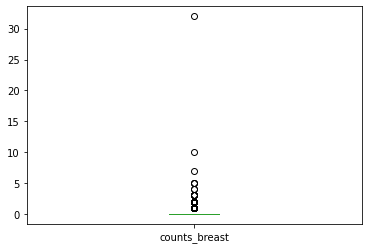

In [15]:
sort_snp_count_all_both_0.boxplot(column=['counts_breast'], grid=False)

<AxesSubplot:>

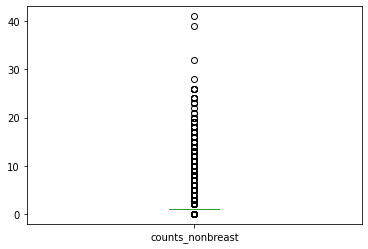

In [16]:
sort_snp_count_all_both_0.boxplot(column=['counts_nonbreast'], grid=False)

In [17]:
sort_snp_count_all_both_0['filter_snps_b'] = sort_snp_count_all_both_0['counts_breast']/ num_donor_b
sort_snp_count_all_both_0['filter_snps_nb'] = sort_snp_count_all_both_0['counts_nonbreast']/ num_donor_nb

C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


w:0.2756664752960205, pvalue:0.0


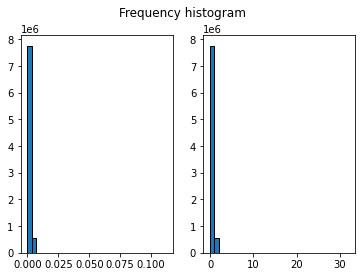

In [18]:
shapiro_test(sort_snp_count_all_both_0, 'counts_breast', 'filter_snps_b')

w:0.6253135204315186, pvalue:0.0


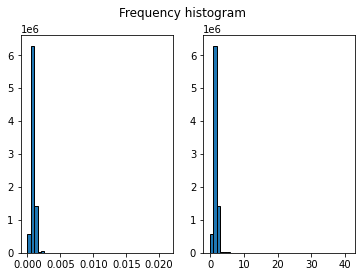

In [19]:
shapiro_test(sort_snp_count_all_both_0, 'counts_nonbreast', 'filter_snps_nb')

In [20]:
mannwhitney(sort_snp_count_all_both_0, 'filter_snps_b', 'filter_snps_nb')

MannwhitneyuResult(statistic=6942926394327.0, pvalue=0.0)


In [21]:
set(sort_snp_count_all_both_0['counts_nonbreast'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 28,
 32,
 39,
 41}

In [22]:
sort_snp_count_all_both_0, S_C, n, S, C = chi_square_self(sort_snp_count_all_both_0, 'counts_breast', 'counts_nonbreast', num_donor_b, num_donor_nb)
# sort_snp_count_all_both_0 = chi_square(S_C, sort_snp_count_all_both_0)
# sort_snp_count_all_both_0 = log2_fc(sort_snp_count_all_both_0, n, S)
# sort_snp_count_all_both_0 = fisher_test(S_C, sort_snp_count_all_both_0)
# sort_snp_count_all_both_0 = log2_fc(sort_snp_count_all_both_0, n, S)
# sort_snp_count_all_both_0.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/R/sort_snp_count_all_both_0_TESTS.tsv", sep='\t', encoding='utf-8', index=False)

{32.00349650349651, 1.0034965034965035, 2.0034965034965033, 3.0034965034965033, 4.003496503496503, 5.003496503496503, 7.003496503496503, 10.003496503496503, 0.0034965034965034965}
{1.0005122950819672, 2.0005122950819674, 3.0005122950819674, 4.000512295081967, 5.000512295081967, 6.000512295081967, 7.000512295081967, 8.000512295081966, 9.000512295081966, 10.000512295081966, 11.000512295081966, 12.000512295081966, 13.000512295081966, 0.0005122950819672131, 15.000512295081966, 16.00051229508197, 17.00051229508197, 18.00051229508197, 19.00051229508197, 20.00051229508197, 21.00051229508197, 22.00051229508197, 23.00051229508197, 24.00051229508197, 26.00051229508197, 28.00051229508197, 32.00051229508197, 39.00051229508197, 41.00051229508197, 14.000512295081966}
[ 286 1952]
{1940.999487704918, 253.9965034965035}
{275.9965034965035, 1943.999487704918}


In [23]:
set(S_C[0])

{11.000512295081966, 32.00349650349651, 253.9965034965035, 1940.999487704918}

In [24]:
sort_snp_count_all_both_0 = chi_square(S_C, sort_snp_count_all_both_0)

1
1000001
2000001
3000001
4000001
5000001
6000001
7000001
8000001
8329746
--- 2037.8277430000003 seconds ---


In [25]:
sort_snp_count_all_both_0 = fisher_test(S_C, sort_snp_count_all_both_0)

1
1000001
2000001
3000001
4000001
5000001
6000001
7000001
8000001
8329746
--- 3859.4115165 seconds ---


In [26]:
sort_snp_count_all_both_0 = log2_fc(sort_snp_count_all_both_0, n, S)

In [27]:
sort_snp_count_all_both_0.to_csv(f"D:/Hanze_Groningen/STAGE/lastdb/sort_snp_count_all_both_0_TESTS.tsv", sep='\t', encoding='utf-8', index=False)

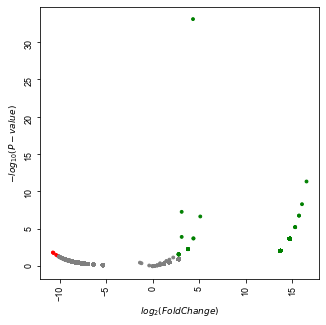

In [28]:
volcano_plot(sort_snp_count_all_both_0, 'p_value_X2_self')

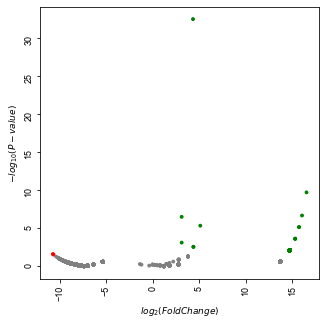

In [29]:
volcano_plot(sort_snp_count_all_both_0, 'p_value_X2')

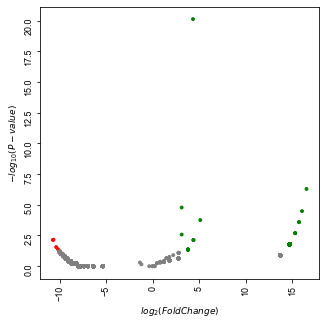

In [30]:
volcano_plot(sort_snp_count_all_both_0, 'p_value_F')

### non-coding (noncoding_breast, noncoding_nonbreast)


set snps
----------
241
4


C:\Users\Anne_\AppData\Local\Temp\ipykernel_21084\884472358.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_R = sort_snp_count_df.reset_index().drop([f'counts_{type_c}', 'index'], 1)


----------
1421
28

merge dfs

boxplot

filter columns (divide by max)

shapiro_test


C:\Users\Anne_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


w:0.2705262303352356, pvalue:0.0


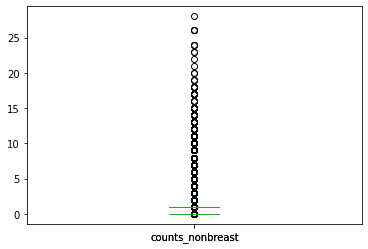

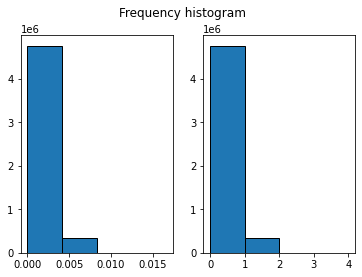

w:0.6033754348754883, pvalue:0.0


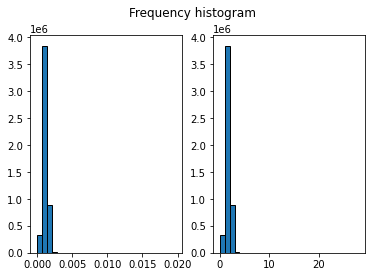


mannwhitney
MannwhitneyuResult(statistic=2532400350791.0, pvalue=0.0)

tests
{1.004149377593361, 2.004149377593361, 3.004149377593361, 4.004149377593361, 0.004149377593360996}
{1.0007037297677692, 2.000703729767769, 3.000703729767769, 4.0007037297677694, 5.0007037297677694, 6.0007037297677694, 7.0007037297677694, 8.00070372976777, 9.00070372976777, 10.00070372976777, 11.00070372976777, 12.00070372976777, 13.00070372976777, 14.00070372976777, 15.00070372976777, 16.000703729767768, 17.000703729767768, 18.000703729767768, 19.000703729767768, 0.0007037297677691766, 21.000703729767768, 22.000703729767768, 23.000703729767768, 24.000703729767768, 20.000703729767768, 26.000703729767768, 28.000703729767768}
[ 241 1421]
{1420.9992962702322, 236.99585062240664}
{1420.9992962702322, 236.99585062240664}
1
1000001
2000001
3000001
4000001
5000001
5092939
--- 1495.3846902 seconds ---
1


KeyboardInterrupt: 

In [15]:
sort_snp_count_noncoding_both_0, noncoding_num_donor_b, noncoding_num_donor_nb = run_snp_tests(noncoding_breast, noncoding_nonbreast, 'NonCoding', 'snp')

### coding (coding_breast, coding_nonbreast)

In [ ]:
sort_snp_count_coding_both_0, coding_num_donor_b, coding_num_donor_nb = run_snp_tests(coding_breast, coding_nonbreast, 'Coding', 'snp')

# position 1000 and 2000

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

In [ ]:
def make_merge_df(path_breast, path_nonbreast):
    colnames=['index', 'counts_breast', 'chr', 'start_region', 'stop_region']
    breast = pd.read_csv(path_breast, sep='\t', header=None, names=colnames)
    breast.sort_values(['chr', 'start_region'], inplace=True)
    
    colnames=['index', 'counts_nonbreast', 'chr', 'start_region', 'stop_region']
    nonbreast = pd.read_csv(path_nonbreast, sep='\t', header=None, names=colnames)   
    nonbreast.sort_values(['chr', 'start_region'], inplace=True)
    
    merged_df = breast.merge(nonbreast, on=['chr', 'start_region', 'stop_region'], how='outer')
    merged_df.drop(columns=['index_x', 'index_y'], inplace=True)
    return merged_df

In [ ]:
def make_df_2000(merge_df):
    df = pd.DataFrame(columns=['counts_breast', 'chr', 'start_region', 'stop_region', 'counts_nonbreast', 'snps_b_double', 'snps_nb_double'])

    # chrom = ['chr4']
    for i in list(set(merge_df['chr'])):
        select_df = merge_df[merge_df['chr'] == i]
        select_df['snps_b_double'] = select_df['counts_breast'] + select_df['counts_breast'].shift(1)
        select_df['snps_nb_double'] = select_df['counts_nonbreast'] + select_df['counts_nonbreast'].shift(1)
        select_df['start_new'] = select_df['start_region'].shift(1) #.astype(str) #+ "_" + select_df['stop_region'].astype(str)
    #     select_df['stop_new'] = select_df['stop_region']       
        select_df = select_df.reset_index()
        select_df.drop(columns=['index'], inplace=True)
        select_df = select_df.reset_index()
        select_df = select_df[(select_df['index'] % 2 != 0) | (select_df['index'] == select_df['index'].max())]
        select_df['start_new'] = list(select_df['start_new'][:-1])+[list(select_df['start_region'])[-1]]
        select_df.drop(columns=['index'], inplace=True)
    #     select_df['stop_new'] = list(select_df['stop_new'][:-1])+[list(select_df['stop_region'])[-1]]
        df = pd.concat([df, select_df])
    df['start_region'] = df['start_new']
    df.drop(columns=['counts_breast', 'counts_nonbreast', 'start_new'], inplace=True)
    df.rename(columns = {'snps_b_double':'counts_breast', 'snps_nb_double':'counts_nonbreast'}, inplace = True)
    return df


### ALL (all_breast, all_nonbreast)

In [ ]:
merge_df = make_merge_df("D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/breast_ALL_1000.tsv", "D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/nonbreast_ALL_1000.tsv")
df_1000_tests = all_test(merge_df, all_num_donor_b, all_num_donor_nb, 'ALL', 'Region_1000')

In [ ]:
df_2000 = make_df_2000(merge_df)
df_2000_tests = all_test(df_2000, all_num_donor_b, all_num_donor_nb, 'ALL', 'Region_2000')

### non-coding (noncoding_breast, noncoding_nonbreast)

In [ ]:
nc_merge_df = make_merge_df("D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/....tsv", "D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/......tsv")
nc_df_1000_tests = all_test(nc_merge_df, noncoding_num_donor_b, noncoding_num_donor_nb, 'NonCoding', 'Region_1000')

In [ ]:
nc_df_2000 = make_df_2000(nc_merge_df)
nc_df_2000_tests = all_test(nc_df_2000, noncoding_num_donor_b, noncoding_num_donor_nb, 'NonCoding', 'Region_2000')

### coding (coding_breast, coding_nonbreast)

In [ ]:
c_merge_df = make_merge_df("D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/....tsv", "D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/......tsv")
c_df_1000_tests = all_test(c_merge_df, coding_num_donor_b, coding_num_donor_nb, 'Coding', 'Region_1000')

In [ ]:
c_merge_df = make_merge_df("D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/....tsv", "D:/Hanze_Groningen/STAGE/R/PLOTS/kary/vs/before/1000_filter/......tsv")
c_df_1000_tests = all_test(c_merge_df, coding_num_donor_b, coding_num_donor_nb, 'Coding', 'Region_1000')

# UCNE

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

### ALL (all_breast, all_nonbreast)

### non-coding (noncoding_breast, noncoding_nonbreast)

### coding (coding_breast, coding_nonbreast)

# TFBS

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

### ALL (all_breast, all_nonbreast)

### non-coding (noncoding_breast, noncoding_nonbreast)

### coding (coding_breast, coding_nonbreast)

# DNase

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

### ALL (all_breast, all_nonbreast)

### non-coding (noncoding_breast, noncoding_nonbreast)

### coding (coding_breast, coding_nonbreast)

# before_gene (promotor)

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

### ALL (all_breast, all_nonbreast)

### non-coding (noncoding_breast, noncoding_nonbreast)

### coding (coding_breast, coding_nonbreast)

# eQTL

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

### ALL (all_breast, all_nonbreast)

### non-coding (noncoding_breast, noncoding_nonbreast)

### coding (coding_breast, coding_nonbreast)

# Genotype

In [ ]:
# df_whole -- # noncoding_df # coding_df -- # all_breast # noncoding_breast # coding_breast --
# all_nonbreast # noncoding_nonbreast # coding_nonbreast

### ALL (all_breast, all_nonbreast)

### non-coding (noncoding_breast, noncoding_nonbreast)

### coding (coding_breast, coding_nonbreast)